<a href="https://colab.research.google.com/github/RoshanKumar854/ML-Projects/blob/main/Coursera_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model subclassing

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Softmax, concatenate

In [ ]:
class MyModel(Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.dense_1 = Dense(64, activation='relu')
    self.dense_2 = Dense(10)
    self.dense_3 = Dense(5)
    self.softmax = Softmax()

  def call(self, inputs):
    X = self.dense_1(inputs)
    y1 = self.dense_2(inputs)
    y2 = self.dense_3(y1)
    concat = concatenate([X, y2])
    return self.softmax(concat)

In [ ]:
model = MyModel()
model(tf.random.uniform([1,10]))
model.summary()

Model: "my_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             multiple                  704       
                                                                 
 dense_7 (Dense)             multiple                  110       
                                                                 
 dense_8 (Dense)             multiple                  55        
                                                                 
 softmax_4 (Softmax)         multiple                  0         
                                                                 
Total params: 869
Trainable params: 869
Non-trainable params: 0
_________________________________________________________________


#Custom layers

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax

In [ ]:
class MyLayer(Layer):
  def __init__(self, units, input_dim):
    super(MyLayer, self).__init__()
    self.w = self.add_weight(shape=(input_dim, units),
                             initializer = 'random_normal')
    self.b = self.add_weight(shape=(units,),
                             initializer ='zeros')

  def call(self, inputs):
    return tf.matmul(inputs, self.w)+self.b

dense_layer = MyLayer(3,5)
X = tf.ones((1,5)) 
print(dense_layer(X))
print(dense_layer.weights)   


tf.Tensor([[ 0.10130207 -0.16356622 -0.10080069]], shape=(1, 3), dtype=float32)
[<tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
array([[-0.00444444, -0.05754108,  0.00845039],
       [ 0.0192987 ,  0.01991498, -0.02887417],
       [ 0.01836175,  0.03628182,  0.02680319],
       [ 0.05639002, -0.13585946, -0.08847172],
       [ 0.01169603, -0.02636248, -0.01870839]], dtype=float32)>, <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]


In [ ]:
class MyLayer(Layer):
  def __init__(self, units, input_dim):
    super(MyLayer, self).__init__()
    self.w = self.add_weight(shape=(input_dim, units),
                             initializer = 'random_normal',
                             trainable=False)
    self.b = self.add_weight(shape=(units,),
                             initializer ='zeros',
                             trainable=False)

  def call(self, inputs):
    return tf.matmul(inputs, self.w)+self.b

dense_layer = MyLayer(3,5)  


In [ ]:
print('trainable weights:', len(dense_layer.trainable_weights))
print('non-trainable weights:', len(dense_layer.non_trainable_weights))

trainable weights: 0
non-trainable weights: 2


In [ ]:
class MyLayerMean(Layer):
  def __init__(self, units, input_dim):
    super(MyLayerMean, self).__init__()
    self.w = self.add_weight(shape=(input_dim, units),
                             initializer = 'random_normal')
    self.b = self.add_weight(shape=(units,),
                             initializer ='zeros')
    self.sum_activation = tf.Variable(initial_value=tf.zeros((units,)),
                                      trainable=False)
    self.number_call = tf.Variable(initial_value= 0,
                                      trainable=False)

  def call(self, inputs):
    activations = tf.matmul(inputs, self.w)+self.b
    self.sum_activation.assign_add(tf.reduce_sum(activations, axis=0))
    self.number_call.assign_add(input.shape[0])
    return activations, self.sum_activation / tf.cast(self.number_call, tf.float32)

dense_layer = MyLayerMean(3,5)

In [ ]:
class MyDropout(Layer):

  def __init__(self, rate):
    super(MyDropout, self).__init__()
    self.rate = rate

  def call(self, inputs):
    return tf.nn.dropout(inputs, rate=self.rate)  

In [ ]:
class MyModel(Model):

  def __init__(self, units_1, input_dim_1, units_2, units_3):
    super(MyModel, self).__init__()
    self.layer_1 = MyLayer(units_1, inputs_dim_1)
    self.dropout_1 = MyDropout(0.5)
    self.layer_2 = MyLayer(units_2, units_1)
    self.dropout_2 = MyDropout(0.5)
    self.layer_3 = MyLayer(units_3, units_2)
    self.softmax = Softmax()

  def call(self, inputs):

    X = self.layer_1(inputs)
    X = tf.nn.relu(X)
    X = self.dropout_1(X)
    X = self.layer_2(inputs)
    X = tf.nn.relu(X)
    X = self.dropout_2(X)
    X = self.layer_3(x)

    return self.softmax(X) 

#Automatic differentiation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

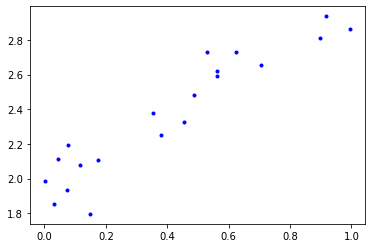

In [ ]:
def MakeNoisyData(m, b, n=20):
  X = tf.random.uniform(shape=(n,))
  noise = tf.random.normal(shape=(len(X), ), stddev=0.1)
  y = m*X + b + noise
  return X, y

m=1 
b=2 
X_train, y_train = MakeNoisyData(m, b)
plt.plot(X_train, y_train, 'b.')

In [ ]:
from tensorflow.keras.layers import Layer

In [ ]:
class LinearLayer(Layer):

  def __init__(self):
    super(LinearLayer, self).__init__()
    self.m = self.add_weight(shape=(1,),
                             initializer='random_normal')
    self.b = self.add_weight(shape=(1,),
                             initializer='zeros')
    
  def call(self, inputs):
    return self.m*inputs+self.b

linear_regression = LinearLayer()

print(linear_regression(X_train))
print(linear_regression.weights)

tf.Tensor(
[0.00139133 0.04109001 0.02176798 0.01702382 0.00192904 0.01577455
 0.00511518 0.02522012 0.00784906 0.02518886 0.00014318 0.04450163
 0.00338335 0.02035631 0.0065772  0.00334537 0.02373742 0.0278601
 0.04019759 0.03158863], shape=(20,), dtype=float32)
[<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.04474239], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [ ]:
def SquaredError(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred-y_true))

starting_loss = SquaredError(linear_regression(X_train), y_train) 
print('Starting_loss', starting_loss.numpy()) 

Starting_loss 5.651774


In [ ]:
learning_rate = 0.05
steps = 25

for i in range(steps):

  with tf.GradientTape() as tape:
    predictions = linear_regression(X_train)
    loss = SquaredError(predictions, y_train)

    gradients = tape.gradient(loss, linear_regression.trainable_variables)
  
  linear_regression.m.assign_sub(learning_rate*gradients[0])
  linear_regression.b.assign_sub(learning_rate*gradients[1])

  print('Steps %d, Loss %f' % (i, loss.numpy()))  

Steps 0, Loss 5.651774
Steps 1, Loss 4.399953
Steps 2, Loss 3.426170
Steps 3, Loss 2.668669
Steps 4, Loss 2.079411
Steps 5, Loss 1.621029
Steps 6, Loss 1.264453
Steps 7, Loss 0.987071
Steps 8, Loss 0.771294
Steps 9, Loss 0.603439
Steps 10, Loss 0.472862
Steps 11, Loss 0.371283
Steps 12, Loss 0.292261
Steps 13, Loss 0.230786
Steps 14, Loss 0.182962
Steps 15, Loss 0.145755
Steps 16, Loss 0.116809
Steps 17, Loss 0.094287
Steps 18, Loss 0.076764
Steps 19, Loss 0.063130
Steps 20, Loss 0.052519
Steps 21, Loss 0.044262
Steps 22, Loss 0.037835
Steps 23, Loss 0.032832
Steps 24, Loss 0.028937


m:1, trained m:[0.91458726]
b:2, trained b:[1.9012756]


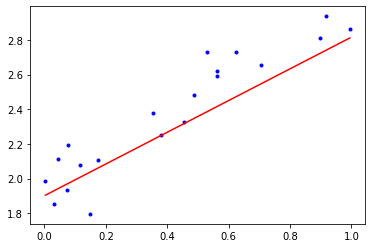

In [ ]:
print('m:{}, trained m:{}'.format(m, linear_regression.m.numpy()))
print('b:{}, trained b:{}'.format(b, linear_regression.b.numpy()))

plt.plot(X_train, y_train, 'b.')

X_linear_regression = np.linspace(min(X_train), max(X_train), 50)
plt.plot(X_linear_regression, linear_regression.m*X_linear_regression+linear_regression.b, 'r-')

#Custom training loops

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax

In [ ]:
class MyLayer(Layer):
  
  def __init__(self, units):
    super(MyLayer, self).__init__()
    self.units = units

  def build(self, input_shape): 
    self.w = self.add_weight(shape=(input_shape[-1], self.units),
                             initializer = 'random_normal',
                             name='kernel')
    self.b = self.add_weight(shape=(self.units,),
                             initializer ='zeros',
                             name='bias')

  def call(self, inputs):
    return tf.matmul(inputs, self.w)+self.b

class MyDropout(Layer):

  def __init__(self, rate):
    super(MyDropout, self).__init__()
    self.rate = rate

  def call(self, inputs):
    return tf.nn.dropout(inputs, rate=self.rate)

class MyModel(Model):

  def __init__(self, units_1, units_2, units_3):
    super(MyModel, self).__init__()
    self.layer_1 = MyLayer(units_1)
    self.dropout_1 = MyDropout(0.5)
    self.layer_2 = MyLayer(units_2)
    self.dropout_2 = MyDropout(0.5)
    self.layer_3 = MyLayer(units_3)
    self.softmax = Softmax()

  def call(self, inputs):

    X = self.layer_1(inputs)
    X = tf.nn.relu(X)
    X = self.dropout_1(X)
    X = self.layer_2(X)
    X = tf.nn.relu(X)
    X = self.dropout_2(X)
    X = self.layer_3(X)

    return self.softmax(X) 


In [ ]:
model = MyModel(64, 64, 46)
print(model(tf.ones((1, 10000))))
model.summary()

tf.Tensor(
[[0.01622508 0.00598815 0.01807079 0.00800093 0.02391237 0.00352383
  0.01071719 0.00384123 0.02418807 0.01503756 0.00589639 0.02750354
  0.01961771 0.06705593 0.04886562 0.01145383 0.01570305 0.00825004
  0.03672316 0.0063246  0.02906112 0.0047113  0.01763435 0.02158134
  0.01069324 0.00649602 0.02294425 0.04294095 0.03736332 0.03970722
  0.00597267 0.00380843 0.02670142 0.04548923 0.01571599 0.02406067
  0.03850258 0.02204512 0.01650836 0.00961687 0.09981821 0.02119427
  0.0095715  0.01519713 0.00648115 0.02928417]], shape=(1, 46), dtype=float32)
Model: "my_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_layer_12 (MyLayer)       multiple                  640064    
                                                                 
 my_dropout_4 (MyDropout)    multiple                  0         
                                                                 
 my_layer_13 (MyLa

In [ ]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

class_names = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [ ]:
print('Label: {}'.format(class_names[train_labels[0]]))

Label: earn


In [ ]:
word_to_index = reuters.get_word_index()

invert_word_index = dict([(value, key) for (key, value) in word_to_index.items()])
text_news = ''.join([invert_word_index.get(i-3, '?') for i in train_data[0]])

In [ ]:
print(text_news)

???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3


In [ ]:
def bag_of_words(text_samples, elements=10000):
    output = np.zeros((len(text_samples), elements))
    for i, word in enumerate(text_samples):
        output[i, word] = 1.
    return output

X_train = bag_of_words(train_data)
X_test = bag_of_words(test_data)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (8982, 10000)
Shape of X_test: (2246, 10000)


In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

def loss(model, X, y, wd):
    kernel_variables = []
    for l in model.layers:
        for w in l.weights:
            if 'kernel' in w.name:
                kernel_variables.append(w)
    wd_penalty = wd * tf.reduce_sum([tf.reduce_sum(tf.square(k)) for k in kernel_variables])
    y_ = model(X)
    return loss_object(y_true=y, y_pred=y_) + wd_penalty

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
def grad(model, inputs, targets, wd):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, wd)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)